I could not set t_sim to 3000 seconds. with dt=0.001s. 
I did a quick calculation of the time required to go from t=1 second to t=2 second and it will take approximately 40 hours. 
And my Jupyter notebook is crashing for more than the limit I have used here. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PVREDNOSTI, IZLAZ, DEFPOLJA 
# Input files (PVREDNOSTI: initial conditions are there; IZLAZ: output to be shown in graph is there; 
# DEFPOLJA: field definitions are there)

[0.00701074]


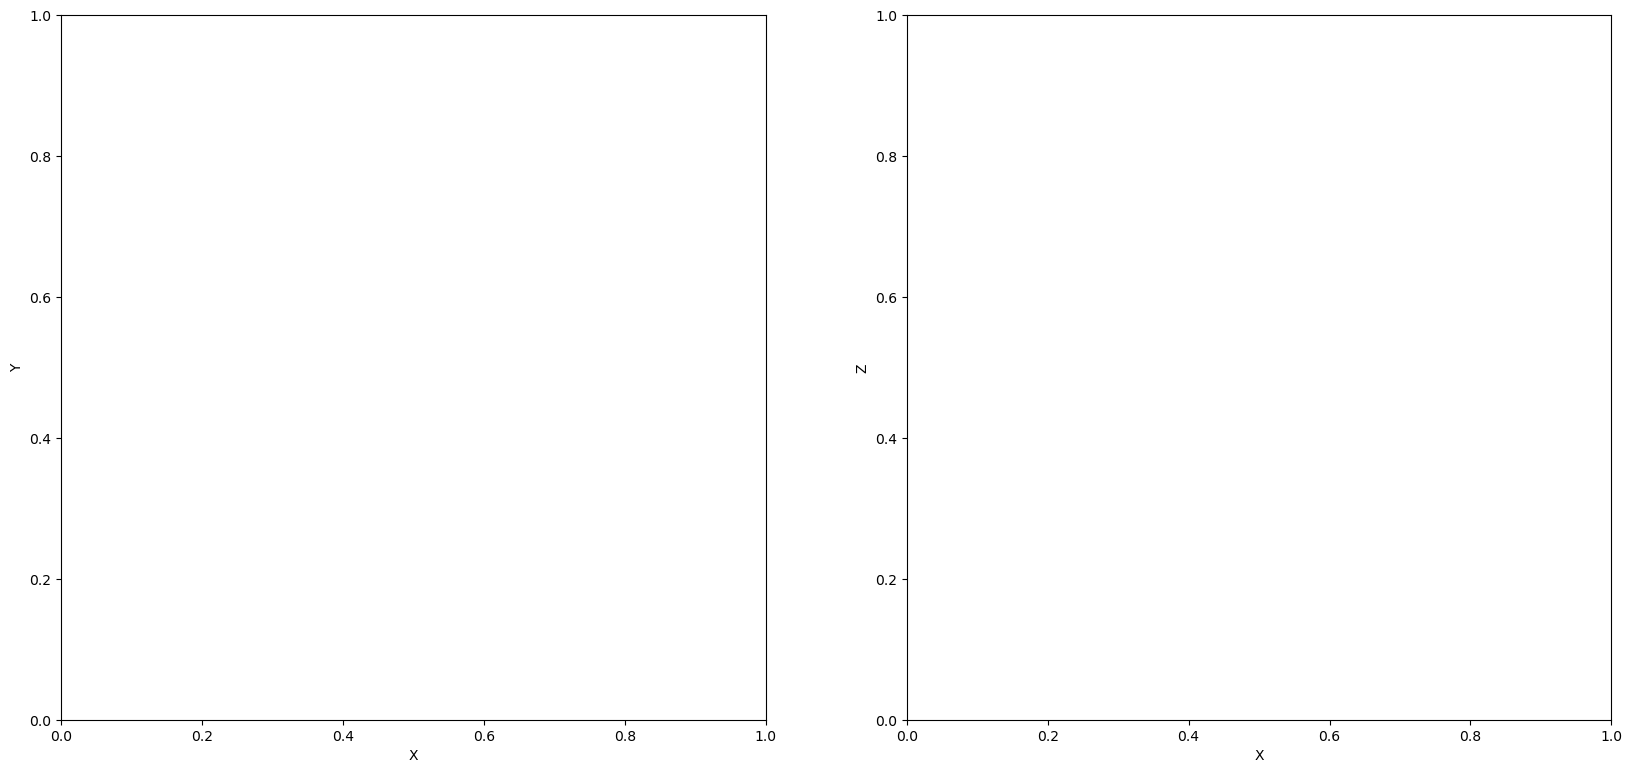

/home/sagarika/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


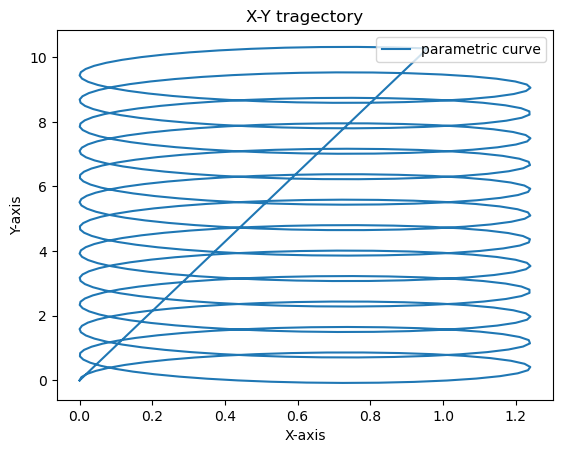

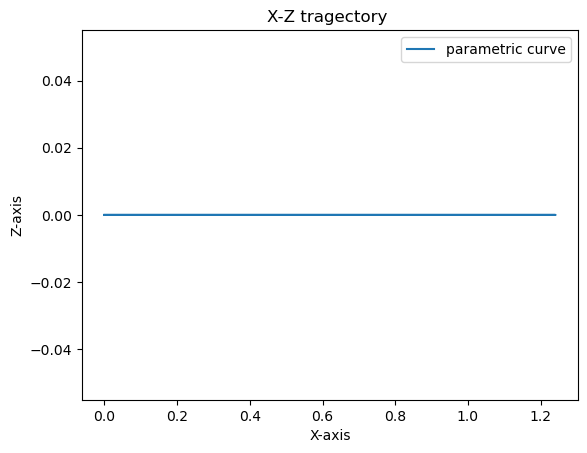

In [2]:
# Based on V. Zekovic & B. Arbutina, Nucl. Part. Phys. Proc. 297-299, 53-57 (2018) but with different 
#numerical algorithm
# Magnetic Verlet


#############################
# Input parameters
#############################

N = 1 # we use only one particle

T_sim = 100.0 #3000.0 # simulation duration [s]
dt = 0.1 #0.001 # time step
T_smp = 0.1 #5.0 # times step for graphical representation

##########################
# definitions of variables
##########################

l = 0
q = np.zeros(N)
m = np.zeros(N)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)
EPx = 0.0
EPy = 0.0
EPz = 0.0
BPx = 0.0
BPy = 0.0
BPz = 0.0   
pomx = np.zeros(N)
pomy = np.zeros(N)
pomz = np.zeros(N)

#################
# initialization
#################

t = 0.0
 
q, m, x, y, z, vx, vy, vz = PVREDNOSTI.puslovi_2(N, np)

BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.const_B2(x, y, z, t)

fig, sp1, sp2 = IZLAZ.init_plots(plt)

#ADDED LATER #####################################################################################

xx = np.zeros(10000000)
yy = np.zeros(10000000)
zz = np.zeros(10000000)

ii = 0

xx[ii] = x
yy[ii] = y
zz[ii] = z

##################################################################################################

###############
# Main loop
###############
# See
# https://aapt.scitation.org/doi/10.1119/10.0001876
# https://arxiv.org/abs/2008.11810
# https://www.compadre.org/PICUP/resources/Numerical-Integration/

kinetickainit = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

while t < (T_sim - dt):

    t = t + dt
    
    pomx = vx + ((q*dt*0.5/m)*(EPx + (vy*BPz) - (BPy*vz)))
    pomy = vy + ((q*dt*0.5/m)*(EPy + (vz*BPx) - (BPz*vx)))
    pomz = vz + ((q*dt*0.5/m)*(EPz + (vx*BPy) - (BPx*vy)))

    x = x + (pomx*dt)
    y = y + (pomy*dt)
    z = z + (pomz*dt)

    BPx, BPy, BPz, EPx, EPy, EPz = DEFPOLJA.const_B2(x, y, z, t)
    
    #print(y) #new

    pomx = pomx + ((q*dt*0.5/m)*EPx)
    pomy = pomy + ((q*dt*0.5/m)*EPy)
    pomz = pomz + ((q*dt*0.5/m)*EPz)

    vx = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomx + ((q*dt*0.5/m)*(pomy*BPz - pomz*BPy)) + (((q*dt*0.5/m)**2.0)*BPx*(pomx*BPx + pomy*BPy + pomz*BPz)))

    vy = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomy + ((q*dt*0.5/m)*(pomz*BPx - pomx*BPz)) + (((q*dt*0.5/m)**2.0)*BPy*(pomx*BPx + pomy*BPy + pomz*BPz))) 

    vz = ((1.0 + (((q*dt*0.5/m)**2.0)*(BPx**2.0 + BPy**2.0 + BPz**2.0)))**(-1.0))*(pomz + ((q*dt*0.5/m)*(pomx*BPy - pomy*BPx)) + (((q*dt*0.5/m)**2.0)*BPz*(pomx*BPx + pomy*BPy + pomz*BPz)))
    
    #ADDED LATER####################################################################################
    
    t = t + dt

    ii = ii + 1
    xx[ii] = x
    yy[ii] = y
    zz[ii] = z
    
    # Calculate the radius of the trajectory
    #radius = np.sqrt(xx**2 + yy**2)
    
    # Calculate the angles between consecutive displacement vectors
    #angles = np.arctan2(yy[1:] - yy[:-1], xx[1:] - xx[:-1])

    # Calculate the differences between consecutive angles
    #angle_diff = np.diff(angles)

    # Determine the rotation direction
    #rotation_direction = 'Clockwise' if np.sum(angle_diff) < 0 else 'Counterclockwise'

    
    ###################################################################################################

    ###################################
    # show in graph
    ###################################

    l += 1
    
    if l*dt >= T_smp:

        l = 0.0
        #IZLAZ.write_plots_2(sp1, sp2, plt, x, y, z, t, T_sim) # show in real time

kinetickafin = m*0.5*(vx**2.0 + vy**2.0 + vz**2.0)

mod=(kinetickainit - kinetickafin)/kinetickainit
print(mod)

###################ADDED LATER#########################

# Print the rotation direction
#print("Rotation Direction:", rotation_direction)

#average_radius = np.mean(radius)
#print("Average radius of trajectory=", average_radius)


# Create a figure and an axis object
fig_xy = plt.figure()
ax_xy = fig_xy.add_subplot(111)

# Plot the parametric curve in x-y plane
ax_xy.plot(xx, yy, label='parametric curve')
ax_xy.legend()

plt.title('X-Y tragectory')
ax_xy.set_xlabel('X-axis')
ax_xy.set_ylabel('Y-axis')
ax_xy.legend()
plt.show()

# Show the plot with x-y axis
plt.show()


# Create a figure and an axis object
fig_xz = plt.figure()
ax_xz = fig_xz.add_subplot(111)

# Plot the parametric curve in x-z plane
ax_xz.plot(xx, zz, label='parametric curve')
ax_xz.legend()

plt.title('X-Z tragectory ')
ax_xz.set_xlabel('X-axis')
ax_xz.set_ylabel('Z-axis')
ax_xz.legend()
plt.show()

# Show the plot with x-z axis
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xx, yy, zz, label='parametric curve')
plt.title('Tragectory')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()
plt.show()

In [ ]:
#import plotly.graph_objs as go

#fig = go.Figure(data=[go.Scatter3d(x=xx, y=yy, z=zz, mode='lines', name='parametric curve for electron')])
#fig.update_layout(title='Trajectory for an electron')
#fig.show()